Name: <i>Ardhika Rizki Akbar Pratama</i>  
Student ID: <i>123230057</i>  
Class: <i>IF -H </i>  

# Data Science Practical - Quiz
> "The best students are those who maximize the use of markdown. Truly, grade A belongs to those who are patient and willing to learn." ~ Laboratory Assistant

> #### **FILL ALL WITH THE CORRECT ANSWERS!**
> **YOU CAN ADD MORE MARKDOWNS/COMMENTS (PLUS POINT HEREEEE!!!!!)**

# KMeans Clustering — Students Performance
Short case: cluster students using **math score** and **writing score**.

You can see the detail of datasets [here](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams)

Download the dataset, and then place the CSV file `StudentsPerformance.csv` inside `./datasets/` before running.

## 1. Import libraries

In [1]:
# Scale the features before clustering
#  ==> your code here <=
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

#In this section we imported library into our local with this library we can analyze dataset with K-Means Clustering

## 2. Data preparation
Load dataset, show a few rows, types, basic stats, missing values, handle duplicates.

In [2]:
# Load the dataset
#  ==> your code here <==
df = pd.read_csv('datasets/dataset.csv')
#read Dataset from folder dataset and reading file with name StudentsPerformance.csv
# SHOW 5 FIRST ROW
print("First 5 rows of the dataset:")
display(df.head())


First 5 rows of the dataset:


,video_id,title,channel_name,tanggal,author,komentar,label,komentar_clean,predicted_label
0,f8UEkmYXlzA,SKAKMAT AHOK,Pandji Pragiwaksono,1.745.412.234.123.970,TerranceNoelle-o9i,Makin yakin abis baca review lain tentang ✌✌𝐒𝐆...,1,makin yakin abis baca review lain tentang 𝐒𝐆𝐈𝟖𝟖 .,0
1,XI8K0-_kbHc,GAK NYANGKA BISA BEGINI! PENGENDARA DIJALAN SA...,Jejelogy,1.739.601.493.342.000,deraatvexplorerriders.2113,Paling suka model H2 😍🔥,0,suka model h2,0
2,nZoNbiwP2ZE,Akhirnya Selesai Subaru Crosstrek Family Drift...,Garasi Drift,1.739.772.479.808.090,risqokurniadi7208,Mobilnya udah hancur 🥺,0,mobilnya udah hancur,0
3,QpXcKzQInXg,Review Mobil Drift Seharga Super Car | BRZ V8 ...,Garasi Drift,1.738.825.556.100.780,LorrianeDotson,░𝙈𝘼𝙉𝙐𝙏88░benar2 bikin aku jadi sultan,1,░𝙈𝘼𝙉𝙐𝙏88░benar2 bikin sultan,1
4,nZoNbiwP2ZE,Akhirnya Selesai Subaru Crosstrek Family Drift...,Garasi Drift,1.739.858.865.953.920,Elpoco7365,Semoga lekas recover mobilnya mas Dipo,0,semoga lekas recover mobilnya mas dipo,0


In [4]:
# DATASETS INFO
print("Dataset info:")
print(df.info())  # dataset structure (columns, types, nulls)


# DESCRIPTIVE STATISTICS
print("\nDescriptive statistics:")
display(df.describe(include='all'))  # summary for numeric & categorical

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10230 entries, 0 to 10229
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   video_id         10230 non-null  object
 1   title            10230 non-null  object
 2   channel_name     10230 non-null  object
 3   tanggal          10230 non-null  object
 4   author           10230 non-null  object
 5   komentar         10230 non-null  object
 6   label            10230 non-null  int64 
 7   komentar_clean   10230 non-null  object
 8   predicted_label  10230 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 719.4+ KB
None

Descriptive statistics:


,video_id,title,channel_name,tanggal,author,komentar,label,komentar_clean,predicted_label
count,10230,10230,10230,10230,10230,10230,10230.000000,10230,10230.000000
unique,32,32,18,7289,9267,9001,NaN,8903,NaN
top,gP0YCMCJnjA,Presiden Prabowo Menjawab,Garasi Drift,2025-05-01 02:30:42+00:00,caaneedsleep,"terbaik kak , salam weton88",NaN,"modal receh , lgsng mekswin gg",NaN
freq,1453,1453,1951,377,28,7,NaN,9,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.411437,NaN,0.408113
std,NaN,NaN,NaN,NaN,NaN,NaN,0.492118,NaN,0.491508
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000


In [5]:
# Check and handle missing values
# Missing values
#  ==> your code here <==
print("\nMissing values per column:")
display(df.isna().sum())  # count missing values per column


# Remove duplicates if any
#  ==> your code here <==
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())  # count duplicates


Missing values per column:


video_id           0
title              0
channel_name       0
tanggal            0
author             0
komentar           0
label              0
komentar_clean     0
predicted_label    0
dtype: int64


Number of duplicate rows:
0


### Keterangan
Di DataSet Kali ini tidak ada duplikat rows dan missing values, jika ada duplikat rows atau missing values bisa menggunakan code :

#  HANDLE MISSING VALUES WITH MEDIAN IMPUTATION
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
df[['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']] = imputer.fit_transform(
    df[['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']]
)


# if data frame have duplicates using this code
 df = df.drop_duplicates()    # remove duplicate rows
 print("Number of duplicates after:", df.duplicated().sum())   # re-check



## 3. Exploratory Data Analysis (EDA)
- Scatter: `math` vs `writing`
- Histogram: `math` score
- Correlation heatmap between `available numeric features`

See the supposedImg folder for the example

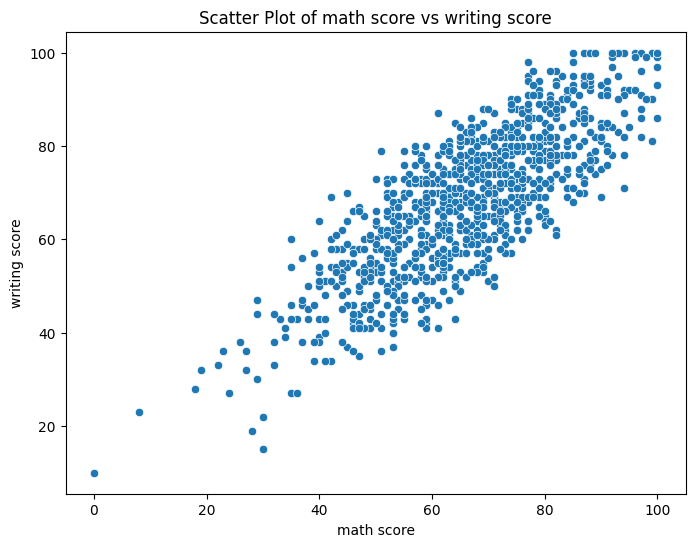

In [5]:
# Scatter plot visualization
#  ==> your code here <==
# Display using scatter plot math vs writing

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='math score', y='writing score')
plt.title('Scatter Plot of math score vs writing score')
plt.xlabel('math score')
plt.ylabel('writing score')
plt.show()


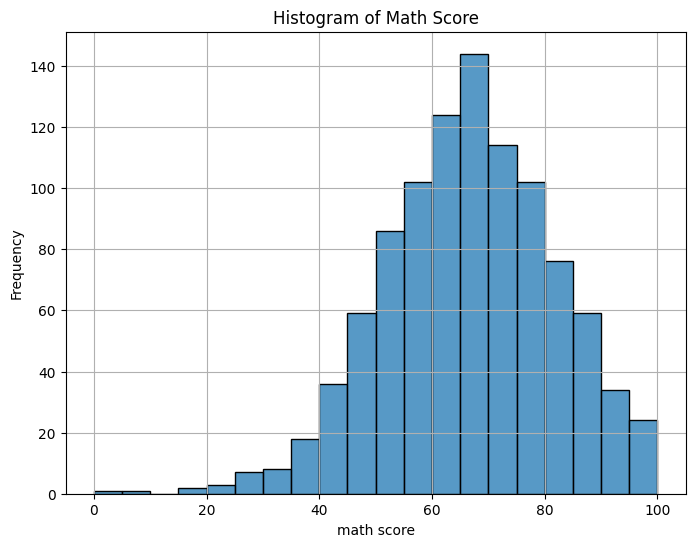

In [6]:
# Histogram visualization
#  ==> your code here <==
# visualtization math score 

plt.figure(figsize=(8, 6))
sns.histplot(df['math score'], bins=20, kde=False, )
plt.title('Histogram of Math Score')
plt.xlabel('math score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

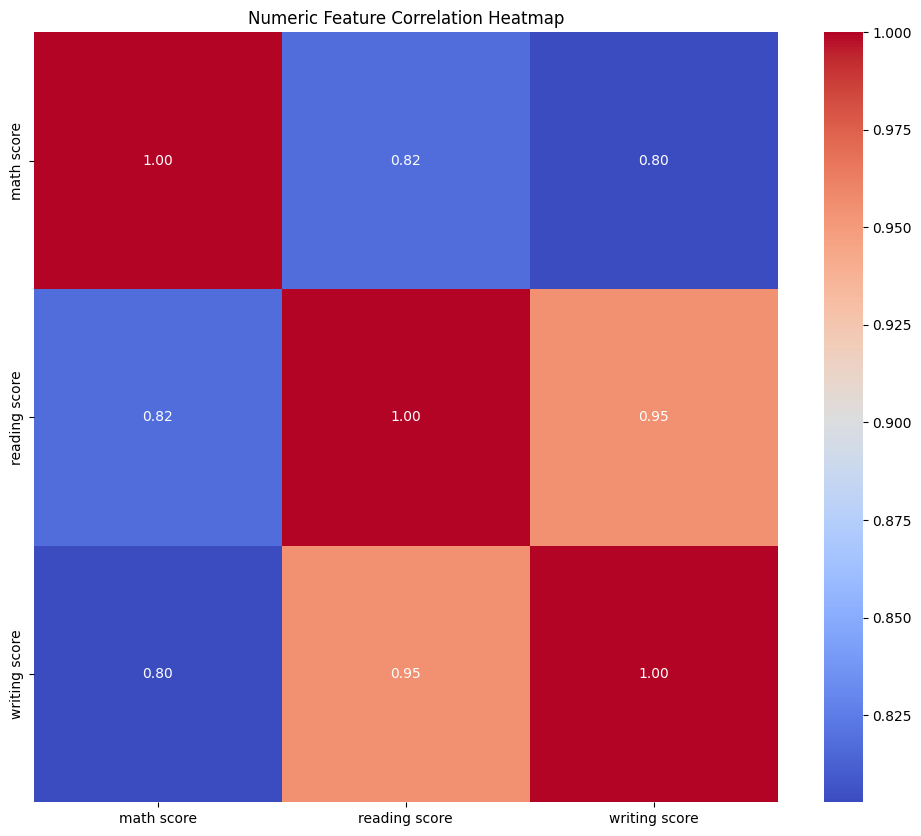

In [7]:
# Correlation heatmap visualization
#  ==> your code here <==

correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".2f")
plt.title('Numeric Feature Correlation Heatmap')
plt.show()

## 4. Feature selection
Use only `math score` and `writing score` for 2D clustering.

In [8]:
#  ==> your code here <==
df_selected  = df[['math score', 'writing score']]
df_selected.head()


,math score,writing score
0,72,74
1,69,88
2,90,93
3,47,44
4,76,75


## 5. Preprocessing (scaling)

In [9]:
# Scale the features before clustering
#  ==> your code here <==

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)
df_scaled = pd.DataFrame(df_scaled, columns=df_selected.columns)
print("Scaled Data (first 5 rows):")
display(df_scaled.head())

Scaled Data (first 5 rows):


,math score,writing score
0,0.390024,0.391492
1,0.192076,1.313269
2,1.577711,1.642475
3,-1.259543,-1.583744
4,0.653954,0.457333


## 6. Determine optimal K
Use Elbow (inertia) and Silhouette score to pick K. Try K from 2 to 8.

See the supposedImg folder for the example

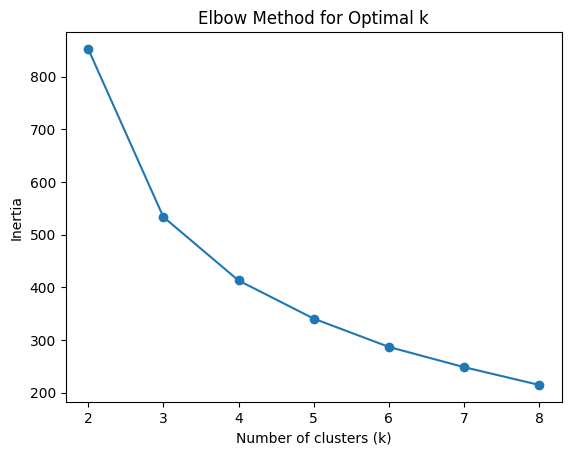

In [10]:
# Loop through possible k values and compute inertia & silhouette score
#  ==> your code here <==
inertia = []
k_range = range(2, 9)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)



# Plot
#  ==> your code here <==
plt.plot(k_range, inertia, marker='o' )
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
# plt.grid(True)
plt.show()

## 7. Train final KMeans
Choose the k with the highest silhouette or a sensible elbow. We'll pick the best silhouette automatically(PLUS POINT) or you can do it manually(NORMAL POINT).

In [11]:
# Train final KMeans model with chosen k
# Choose k with max silhouette
#  ==> your code here <==
k = 2
kmeans = KMeans(n_clusters = k, random_state=42, n_init=10)
labels = kmeans.fit_predict(df_scaled)
print(kmeans)

# df_scaled['Cluster'] = labels


shiluette_avg = silhouette_score(df_scaled, labels)
print(f'Silhouette Score for k={k}: {shiluette_avg}')



KMeans(n_clusters=2, n_init=10, random_state=42)
Silhouette Score for k=2: 0.47016476305340477


Silhouette Score for k=2: 0.47016476305340477
Silhouette Score for k=3: 0.41804223773373783
Silhouette Score for k=4: 0.3706163344212361
Silhouette Score for k=5: 0.34329286435564416
Silhouette Score for k=6: 0.33721264525148814
Silhouette Score for k=7: 0.33404068431152517
Silhouette Score for k=8: 0.35079008805762496
The best shiloute score is 0.47016476305340477


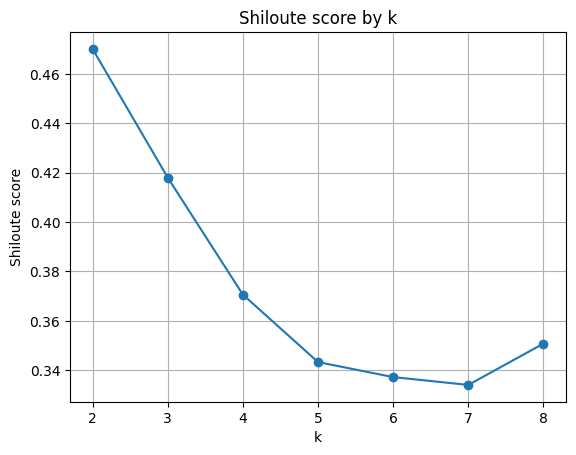

In [12]:
k_jarak = range(2,9)
shilloute_array = []
for k in k_jarak:
   kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
   labelsloop = kmeans.fit_predict(df_scaled)
   shiluette_avg = silhouette_score(df_scaled, labelsloop)
   shilloute_array.append(shiluette_avg)
   print(f'Silhouette Score for k={k}: {shiluette_avg}')

highest_score = max(shilloute_array)
print(f"The best shiloute score is {highest_score}")
plt.plot(k_jarak, shilloute_array, marker='o' )
plt.xlabel('k')
plt.ylabel('Shiloute score')
plt.title('Shiloute score by k')
plt.grid(True)
plt.show()

## 8. Visualization of clusters
Scatter plot showing clusters and centers.

See the supposedImg folder for the example

[1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1
 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 1 1
 0 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1
 1 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0
 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 0 0 1
 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 1
 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0
 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0
 1 1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1
 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0
 1 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1
 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1
 0 0 0 0 1 0 1 0 1 1 1 1 

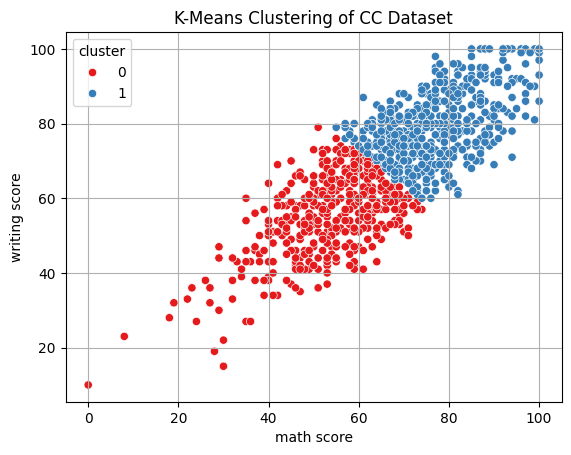

In [13]:
# Scatter plot visualization
#  ==> your code here <==
df['cluster'] = labels
# debugging
print(labels)
# print(df.head())
# print(kmeans.cluster_centers_)

sns.scatterplot(data=df, x='math score', y='writing score', hue='cluster', palette='Set1')
# plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', marker='x', s=200, label = "Centroid")
plt.title('K-Means Clustering of CC Dataset')
plt.grid(True)
plt.show()

## 9. Conclusion
### Fill The Conclussion Here (example: cluster 0 is for blabla, cluster 1 is for blablabla, etc)

Explanation :

cluster 0 is people who have math and writing score under 80 and 

cluster 1 is people who majority have math and writing score above 80

with the result we can grouping the student with score and give the group 1 which is majority under 80, extra study for writing and math score 